In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
#connecting colab to my drive ) so please add a folder named IDS project in your drive if you really want to run it 
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Mounted at /gdrive
/gdrive


In [ ]:
#locating training and testing dataset in my drive
%cd My\ Drive
%cd IDS\ project
! ls

/gdrive/My Drive
/gdrive/My Drive/IDS project
cars.csv  Diabetes-Data  diabetes-data.tar.Z


In [ ]:
df=pd.read_csv('cars.csv')

In [ ]:
#I have taken liberty to add column headers in cars2
df2=pd.read_csv('cars2.csv')

In [ ]:
#could have used the one without headers but it was easier to understnd this way
df2.head()

buy_price maintenance_costs num_doors persons trunk_size safety overall_score
0     vhigh             vhigh         2       2      small    med         unacc
1     vhigh             vhigh         2       2      small   high         unacc
2     vhigh             vhigh         2       2        med    low         unacc
3     vhigh             vhigh         2       2        med    med         unacc
4     vhigh             vhigh         2       2        med   high         unacc

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buy_price          1728 non-null   object
 1   maintenance_costs  1728 non-null   object
 2   num_doors          1728 non-null   object
 3   persons            1728 non-null   object
 4   trunk_size         1728 non-null   object
 5   safety             1728 non-null   object
 6   overall_score      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#data description row wise division for each columns 
col_names = ['buy_price','maintenance_costs','num_doors','persons','trunk_size','safety','overall_score']
for col in col_names:    
    print(df2[col].value_counts())

low      433
med      432
high     432
vhigh    431
Name: buy_price, dtype: int64
low      433
med      432
high     432
vhigh    431
Name: maintenance_costs, dtype: int64
5more    433
3        432
4        432
2        431
Name: num_doors, dtype: int64
more    577
4       576
2       575
Name: persons, dtype: int64
big      577
med      576
small    575
Name: trunk_size, dtype: int64
high    577
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      66
Name: overall_score, dtype: int64


In [ ]:
#variable we are predicting
df2['overall_score'].value_counts()

unacc    1209
acc       384
good       69
vgood      66
Name: overall_score, dtype: int64

In [ ]:
# check missing values in variables
df2.isnull().sum()

buy_price            0
maintenance_costs    0
num_doors            0
persons              0
trunk_size           0
safety               0
overall_score        0
dtype: int64

In [ ]:
#declaring feature vector and target variable
X = df2.drop(['overall_score'], axis=1)
y = df2['overall_score']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
#checking the traing heads
X_train.head()

buy_price maintenance_costs num_doors persons trunk_size safety
48       vhigh             vhigh         3    more        med    med
468       high             vhigh         3       4      small    med
155      vhigh              high         3    more        med    low
1721       low               low     5more    more        med    low
1208       med               low         2    more        med    low

In [ ]:
#apparently not available by default do downloading category encoder
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:
# importing category encoders just to make my life easier
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#this will give differnt elements different interger value 
encoder = ce.OrdinalEncoder(cols=['buy_price','maintenance_costs','num_doors','persons','trunk_size','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train.head()

buy_price  maintenance_costs  num_doors  persons  trunk_size  safety
48            1                  1          1        1           1       1
468           2                  1          1        2           2       1
155           1                  2          1        1           1       2
1721          3                  3          2        1           1       2
1208          4                  3          3        1           1       2

In [ ]:
X_test.head()

buy_price  maintenance_costs  num_doors  persons  trunk_size  safety
599           2                  2          4        3           3       2
1201          4                  3          3        2           1       3
628           2                  2          2        3           3       3
1498          3                  2          2        2           1       3
1263          4                  3          4        1           1       1

In [ ]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
#fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#pridicting the test set
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

accuracy score: 0.7863


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
#going to use it for overfitting test

In [ ]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training accuracy score: 0.7727


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7727
Test set score: 0.7863


given the fact the values are really compareable implies that the data was not overfitted

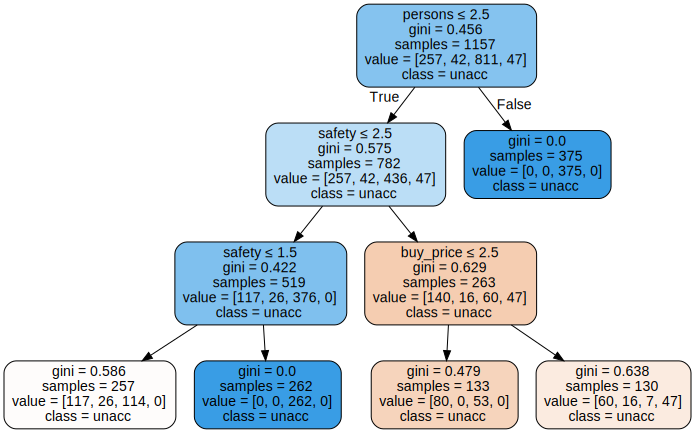

In [ ]:
# printing the desision tree
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

adding the desison tree classifier with chriteerion entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7863


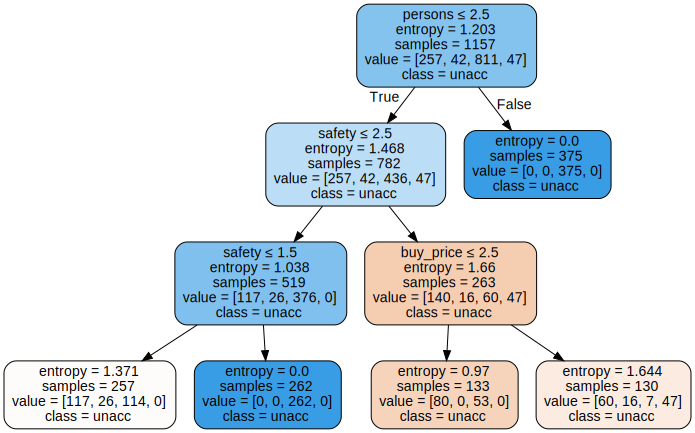

In [ ]:
#decision tree with entropy
new_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(new_data) 
graph 

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print(cm)

[[127   0   0   0]
 [ 27   0   0   0]
 [ 76   0 322   0]
 [ 19   0   0   0]]


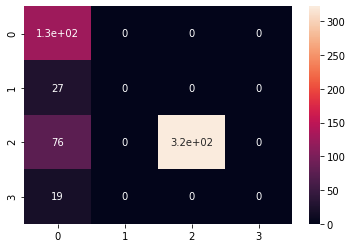

In [ ]:
#visualizign the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)